In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as ani

ZADANIE 1 - Problem dwóch ciał Eulerem, orbita

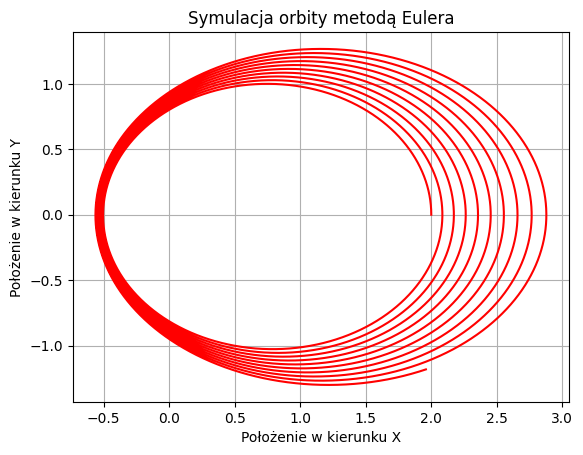

In [2]:
# Funkcja siły i energii potencjalnej

def force(M, m, r, G):
    length = math.sqrt(r[0]**2 + r[1]**2)
    output_1 = -G * M * m / (r[0]**2 + r[1]**2) / length * r[0]
    output_2 = -G * M * m / (r[0]**2 + r[1]**2) / length * r[1]
    return [output_1, output_2]

def energy(M, m, r, G):
    output = -G * M * m / math.sqrt(r[0]**2+r[1]**2)
    return output

# Funkcje skokowe

def rStep(r, p, dt, M, m, G):
    r_1 = r[0] + p[0] * dt / m + force(M, m, r, G)[0] / 2 / m * (dt**2)
    r_2 =  r[1] + p[1] * dt / m + force(M, m, r, G)[1] / 2 / m * (dt**2)
    return [r_1, r_2]

def pStep(r, p, dt, M, m, G):
    p_1 = p[0] + force(M, m, r, G)[0] * dt
    p_2 = p[1] + force(M, m, r, G)[1] * dt
    return [p_1, p_2]
    
# Ustalenie stałych

gravConst = 0.01
sunMass = 500
planetMass = 0.1
moment = 0.001
totalTime = 50
x_0 = [2, 0]
p_0 = [0, 0.1]

# Obliczenia numeryczne

stepsNum = math.floor(totalTime / moment)
positionArr = np.empty((2, stepsNum))
momentumArr = np.empty((2, stepsNum))
positionArr[:, 0] = x_0
momentumArr[:, 0] = p_0

for t in range(stepsNum - 1):
    positionArr[:, t + 1] = rStep(positionArr[:, t], momentumArr[:, t], moment, sunMass, planetMass, gravConst)
    momentumArr[:, t + 1] = pStep(positionArr[:, t], momentumArr[:, t], moment, sunMass, planetMass, gravConst)

# Wykres

plt.plot(positionArr[0,:], positionArr[1,:], color = 'red')
plt.title('Symulacja orbity metodą Eulera')
plt.xlabel('Położenie w kierunku X')
plt.ylabel('Położenie w kierunku Y')
plt.grid()




ZADANIE 1 - Problem dwóch ciał Eulerem, energia

Text(0.5, 1.0, 'Zależność energii od czasu (Euler)')

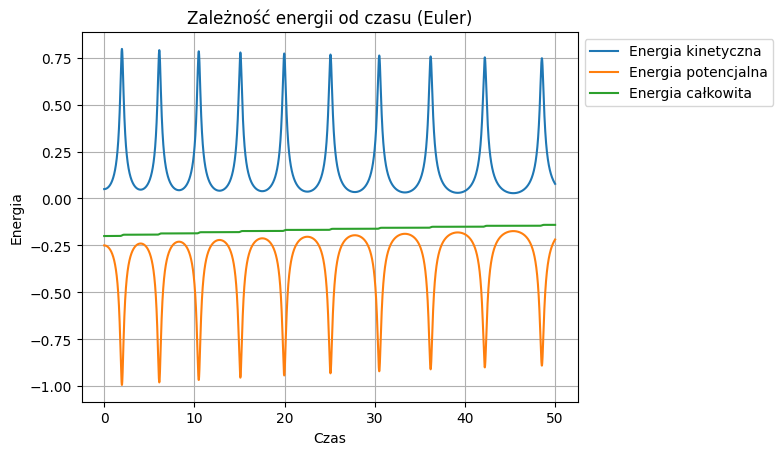

In [3]:
# Przygotowanie pustych tablic

kineticArr = np.empty((2, stepsNum))
potentialArr = np.empty((2, stepsNum))
totalArr = np.empty((2, stepsNum))

# Obliczenia numeryczne

for t in range(stepsNum):
    kineticArr[:, t] = [t * moment, (momentumArr[0,t]**2 + momentumArr[1,t]**2) / 2 / planetMass]
    potentialArr[:, t] = [t * moment, energy(sunMass, planetMass, positionArr[:,t], gravConst)]
    totalArr[0, t] = potentialArr[0, t]
    totalArr[1, t] = kineticArr[1, t] + potentialArr[1, t]

# Wykres

opis = []
plt.plot(kineticArr[0,:], kineticArr[1,:])
opis.append('Energia kinetyczna')
plt.plot(potentialArr[0,:], potentialArr[1,:])
opis.append('Energia potencjalna')
plt.plot(totalArr[0,:], totalArr[1,:])
opis.append('Energia całkowita')
plt.grid()
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.legend(opis, bbox_to_anchor = (1,1))
plt.title('Zależność energii od czasu (Euler)')

ZADANIE 2 - Problem dwóch ciał Verletem

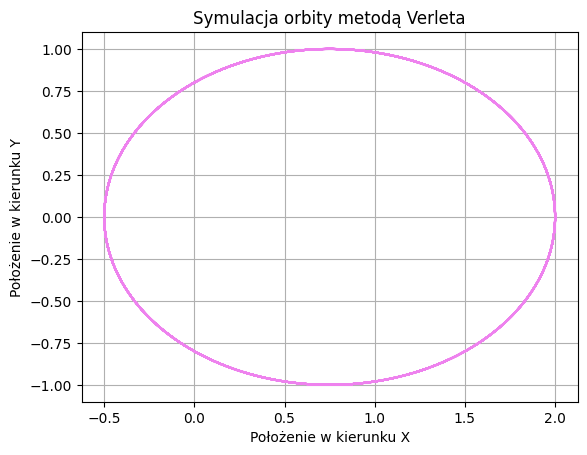

In [4]:
# Funkcje skokowe

def rStepV(r, dt, M, m, G):
    r_1 = 2 * r[0, 1] - r[0, 0] + force(M, m, r[:, 1], G)[0] * (dt**2) / m
    r_2 = 2 * r[1, 1] - r[1, 0] + force(M, m, r[:, 1], G)[1] * (dt**2) / m
    return [r_1, r_2]

# Obliczenia numeryczne

stepsNum = math.floor(totalTime / moment)
positionArr2 = np.empty((2, stepsNum))
positionArr2[:, 0] = [x_0[0] - p_0[0] / planetMass * moment, x_0[1] - p_0[1] / planetMass * moment]
positionArr2[:, 1] = x_0
veloArr2 = np.empty((2, stepsNum))
veloArr2[:, 1] = [p_0[0] / planetMass, p_0[1] / planetMass]
veloArr2[:, 0] = veloArr2[:, 1]

for t in range(stepsNum - 2):
    positionArr2[:, t + 2] =  rStepV(positionArr2[:, t : t + 2], moment, sunMass, planetMass, gravConst)
for t in range(stepsNum - 3):
    veloArr2[:, t + 2] = [(positionArr2[0, t + 3] - positionArr2[0, t + 1]) / (2 * moment), (positionArr2[1, t + 3] - positionArr2[1, t + 1]) / (2 * moment)]

veloArr2[:, stepsNum - 1] = veloArr2[:, stepsNum - 2]

# Wykres

plt.plot(positionArr2[0,:], positionArr2[1,:], color = 'violet')
plt.title('Symulacja orbity metodą Verleta')
plt.xlabel('Położenie w kierunku X')
plt.ylabel('Położenie w kierunku Y')
plt.grid()

ZADANIE 2 - Problem dwóch ciał Verletem, energia

Text(0.5, 1.0, 'Zależność energii od czasu (Verlet)')

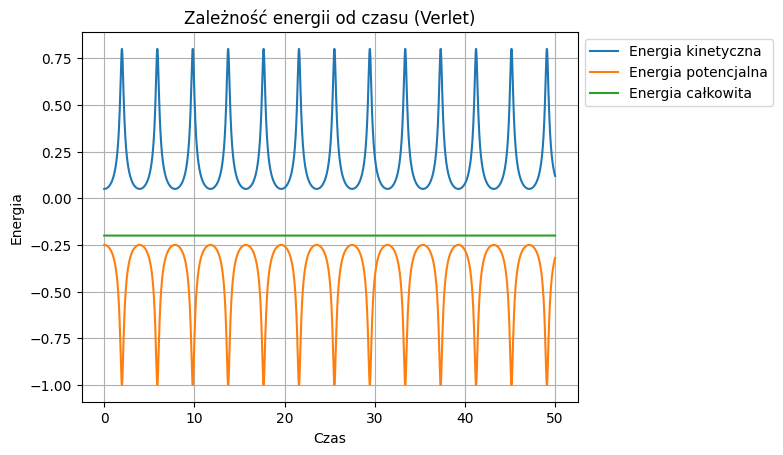

In [5]:
# Przygotowanie pustych tablic

kineticArr2 = np.empty((2, stepsNum))
potentialArr2 = np.empty((2, stepsNum))
totalArr2 = np.empty((2, stepsNum))

# Obliczenia numeryczne

for t in range(stepsNum):
    kineticArr2[:, t] = [(t) * moment, (veloArr2[0, t]**2 + veloArr2[1, t]**2) * planetMass / 2]
    potentialArr2[:, t] = [(t) * moment, energy(sunMass, planetMass, positionArr2[:, t], gravConst)]
    totalArr2[0, t] = potentialArr2[0, t]
    totalArr2[1, t] = kineticArr2[1, t] + potentialArr2[1, t]

# Wykres

opis = []
plt.plot(kineticArr2[0,:], kineticArr2[1,:])
opis.append('Energia kinetyczna')
plt.plot(potentialArr2[0,:], potentialArr2[1,:])
opis.append('Energia potencjalna')
plt.plot(totalArr2[0,:], totalArr2[1,:])
opis.append('Energia całkowita')
plt.grid()
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.legend(opis, bbox_to_anchor = (1,1))
plt.title('Zależność energii od czasu (Verlet)')

ZADANIE 3 - Problem dwóch ciał Żabką

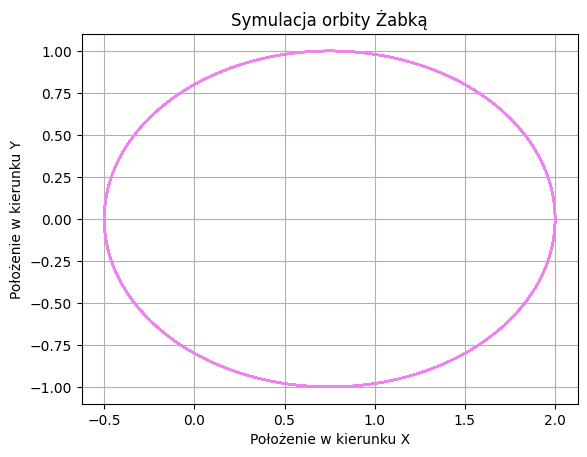

In [6]:
# Funkcje skokowe

def rStep3(r, v, dt):
    r_1 = r[0]+ v[0] * dt
    r_2 = r[1]+ v[1] * dt
    return [r_1, r_2]

def vStep3(r, v, dt, M, m, G):
    v_1 = v[0] + force(M, m, r, G)[0] * dt / m
    v_2 = v[1] + force(M, m, r, G)[1] * dt / m
    return [v_1, v_2]

# Obliczenia numeryczne

positionArr3 = np.empty((2, stepsNum))
positionArr3[:, 0] = x_0
veloArr3 = np.empty((2, stepsNum))
veloArr3[:, 0] = [p_0[0] / planetMass - force(sunMass, planetMass, x_0, gravConst)[0] * moment / (planetMass * 2), p_0[1] / planetMass - force(sunMass, planetMass, x_0, gravConst)[1] * moment / (planetMass * 2)]

for t in range(stepsNum - 1):
    veloArr3[:, t + 1] = vStep3(positionArr3[:, t], veloArr3[:, t], moment, sunMass, planetMass, gravConst)
    positionArr3[:, t + 1] = rStep3(positionArr3[:, t], veloArr3[:, t + 1], moment)

# Wykres

plt.plot(positionArr3[0, :], positionArr3[1, :], color = 'violet')
plt.title('Symulacja orbity Żabką')
plt.xlabel('Położenie w kierunku X')
plt.ylabel('Położenie w kierunku Y')
plt.grid()

ZADANIE 3 - Problem dwóch ciał Żabką, energia

Text(0.5, 1.0, 'Zależność energii od czasu (Żabka)')

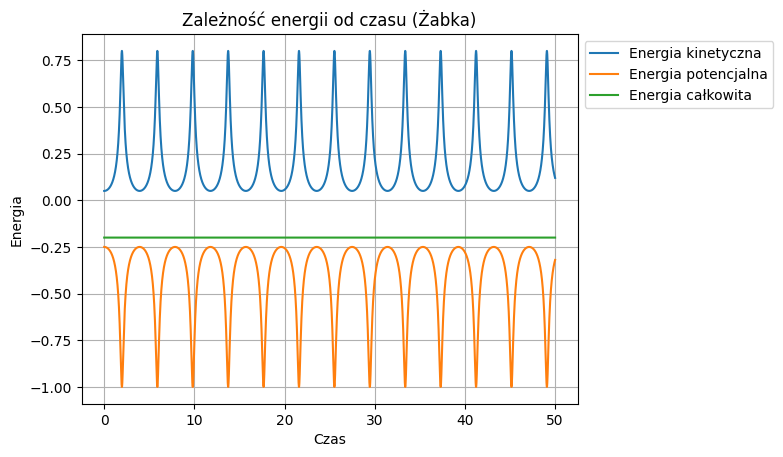

In [7]:
# Obliczenie prędkości w tych samych punktach czasu co położenia

medVelo = np.empty((2, stepsNum - 1))
for t in range(stepsNum - 1):
    medVelo[0, t] = (veloArr3[0, t] + veloArr3[0, t + 1]) / 2
    medVelo[1, t] = (veloArr3[1, t] + veloArr3[1, t + 1]) / 2

    # Przygotowanie pustych tablic

kineticArr3 = np.empty((2, stepsNum - 1))
potentialArr3 = np.empty((2, stepsNum - 1))
totalArr3 = np.empty((2, stepsNum - 1))

# Obliczenia numeryczne

for t in range(stepsNum - 1):
    kineticArr3[:, t] = [(t) * moment, (medVelo[0, t]**2 + medVelo[1, t]**2) * planetMass / 2]
    potentialArr3[:, t] = [(t) * moment, energy(sunMass, planetMass, positionArr3[:, t], gravConst)]
    totalArr3[0, t] = potentialArr3[0, t]
    totalArr3[1, t] = kineticArr3[1, t] + potentialArr3[1, t]

# Wykres

opis = []
plt.plot(kineticArr3[0,:], kineticArr3[1,:])
opis.append('Energia kinetyczna')
plt.plot(potentialArr3[0,:], potentialArr3[1,:])
opis.append('Energia potencjalna')
plt.plot(totalArr3[0,:], totalArr3[1,:])
opis.append('Energia całkowita')
plt.grid()
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.legend(opis, bbox_to_anchor = (1,1))
plt.title('Zależność energii od czasu (Żabka)')

ZADANIE Z GWIAZDKĄ - Balet planetarny

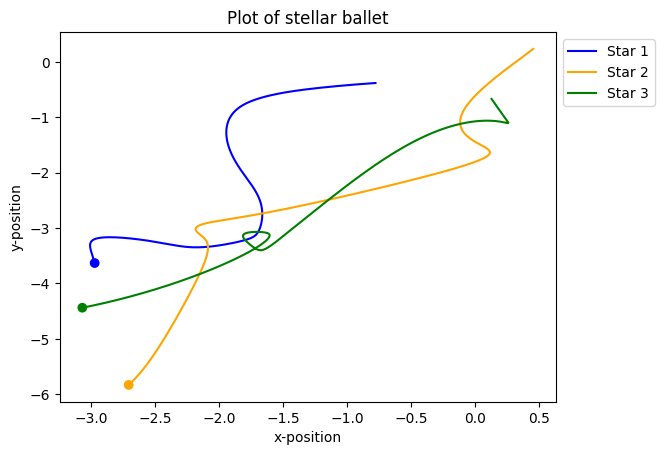

In [24]:
# Ustalenie stałych

m = 1
G = 1
totalTime = 5
moment = 0.001
steps = math.floor(totalTime / moment)
mass = 1
grav = 1
perfect = 'False'

# Warunki początkowe

if(perfect == 'False'):
    r0 = np.random.randn(6)
    vTech = np.random.randn(6)
    v0 = [i / 1 for i in vTech]

if(perfect == 'True'):
    r0 = [0.97000436, -0.24308753]
    r0 += [-r0[0], -r0[1], 0, 0]
    vTech = [0.93240737, 0.86473146]
    v0 = [-vTech[0] / 2, -vTech[1] / 2]
    v0 += v0
    v0 += vTech

# Definicja funkcji siły (w kierunku r2, tj. działająca na ciało 1)

def relForce(r1, r2, m, G): 
    length = math.sqrt((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2)
    output1 = G * m * m / (length**3) * (r2[0] - r1[0])
    output2 = G * m * m / (length**3) * (r2[1] - r1[1])
    return [output1, output2]

# Definicja funkcji kroku

def stepDance(r, dt, a):
    r_1 = 2 * r[0, 1] - r[0, 0] + a[0] * (dt**2)
    r_2 = 2 * r[1, 1] - r[1, 0] + a[1] * (dt**2)
    return [r_1, r_2]

# Przygotowanie tablic pozycji i prędkosci

veloArray = np.empty((6, steps))
posArray = np.empty((6, steps))

veloArray[:, 1] = v0
veloArray[:, 0] = v0
posArray[:, 1] = r0

for i in range(6):
    posArray[i, 0] = (posArray[i, 1] - veloArray[i, 1] * moment)

# Obliczenia numeryczne

for t in range(1, steps - 1):
    for i in [0, 1, 2]:
        indx = [0, 1, 2]
        indx.remove(i)
        [j, k] = indx
        jForce = relForce(posArray[(i * 2) : (i * 2 + 2) , t], posArray[(j * 2) : (j * 2 + 2) , t], mass, grav)
        kForce = relForce(posArray[(i * 2) : (i * 2 + 2) , t], posArray[(k * 2) : (k * 2 + 2) , t], mass, grav)
        acc = [jForce[0]/ mass + kForce[0] / mass, jForce[1]/ mass + kForce[1] / mass]

        posArray[(i * 2) : (i * 2 + 2) , t + 1] = stepDance(posArray[(i * 2) : (i * 2 + 2) , (t - 1) : (t + 1)], moment, acc)

# Wykres

fr = math.floor(steps - 1)

opis = []
plt.plot(posArray[0, 0 : fr], posArray[1, 0 : fr], color = 'blue')
opis.append('Star 1')
plt.plot(posArray[2, 0 : fr], posArray[3, 0 : fr], color = 'orange')
opis.append('Star 2')
plt.plot(posArray[4, 0 : fr], posArray[5, 0 : fr], color = 'green')
opis.append('Star 3')
plt.scatter([posArray[0, fr], posArray[2, fr], posArray[4, fr]], [posArray[1, fr], posArray[3, fr], posArray[5, fr]], color = ['blue', 'orange', 'green'])
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('Plot of stellar ballet')
plt.legend(opis, bbox_to_anchor = (1,1))

ANIMACJA ORBITY

MovieWriter ffmpeg unavailable; using Pillow instead.


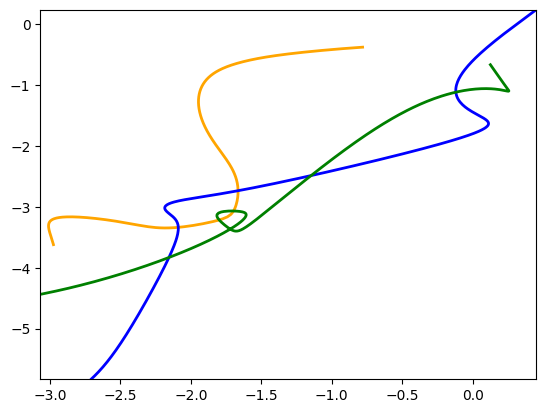

In [25]:
# Ustalamy granice animowanego obszaru

xmin = np.min(np.concatenate((posArray[0, 0 : fr], posArray[2, 0 : fr], posArray[4, 0 : fr])))
xmax = np.max(np.concatenate((posArray[0, 0 : fr], posArray[2, 0 : fr], posArray[4, 0 : fr])))
ymin = np.min(np.concatenate((posArray[1, 0 : fr], posArray[3, 0 : fr], posArray[5, 0 : fr])))
ymax = np.max(np.concatenate((posArray[1, 0 : fr], posArray[3, 0 : fr], posArray[5, 0 : fr])))

# Przygotowujemy planszę do animacji

fig = plt.figure()
ax1 = plt.axes(xlim = (xmin, xmax), ylim = (ymin, ymax))

# Przygotowujemy puste dane

plotlays, plotcols = [3], ["orange", "blue", "green"]
lines = []

for i in range(3):
  linia = ax1.plot([], [], lw = 2, color = plotcols[i])[0]
  lines.append(linia)

xdata1, ydata1 = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []

# Definiujemy funkcję animującą

def init():
    for line in lines:
      line.set_data([], [])
    return lines

def animate(i):
  xdata1.append(posArray[0, 10 * i])
  ydata1.append(posArray[1, 10 * i])

  xdata2.append(posArray[2, 10 * i])
  ydata2.append(posArray[3, 10 * i])

  xdata3.append(posArray[4, 10 * i])
  ydata3.append(posArray[5, 10 * i])

  xlist = [xdata1, xdata2, xdata3]
  ylist = [ydata1, ydata2, ydata3]

  for lnum, line in enumerate(lines):
    line.set_data(xlist[lnum], ylist[lnum])

  return lines

# Animacja

anim = ani.FuncAnimation(fig, animate, init_func = init, frames = math.floor(steps / 10), interval = 200, blit = 'True')
anim.save('Orbita.gif', writer = 'ffmpeg', fps = 30)

plt.show()